 # Imports

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import imageio
import corner_detection
import perspective_transform
import text_detection
import cv2

 # Digital Image Processing Project: Business Card Recognition
 - André Moreira Souza - NºUSP: 9778985
 - Josué Grâce Kabongo Kalala - N°USP: 9770382


 ## Introduction
 ### Objectives
 - Given a digital image of a business card:
   - Repair the perspective of the photo and store the result.
   - Detect/recognize text in the image.


 ### Data sources
 - Photos taken from a cellphone.
 - Web images for testing individual features.


 Below are a few examples:

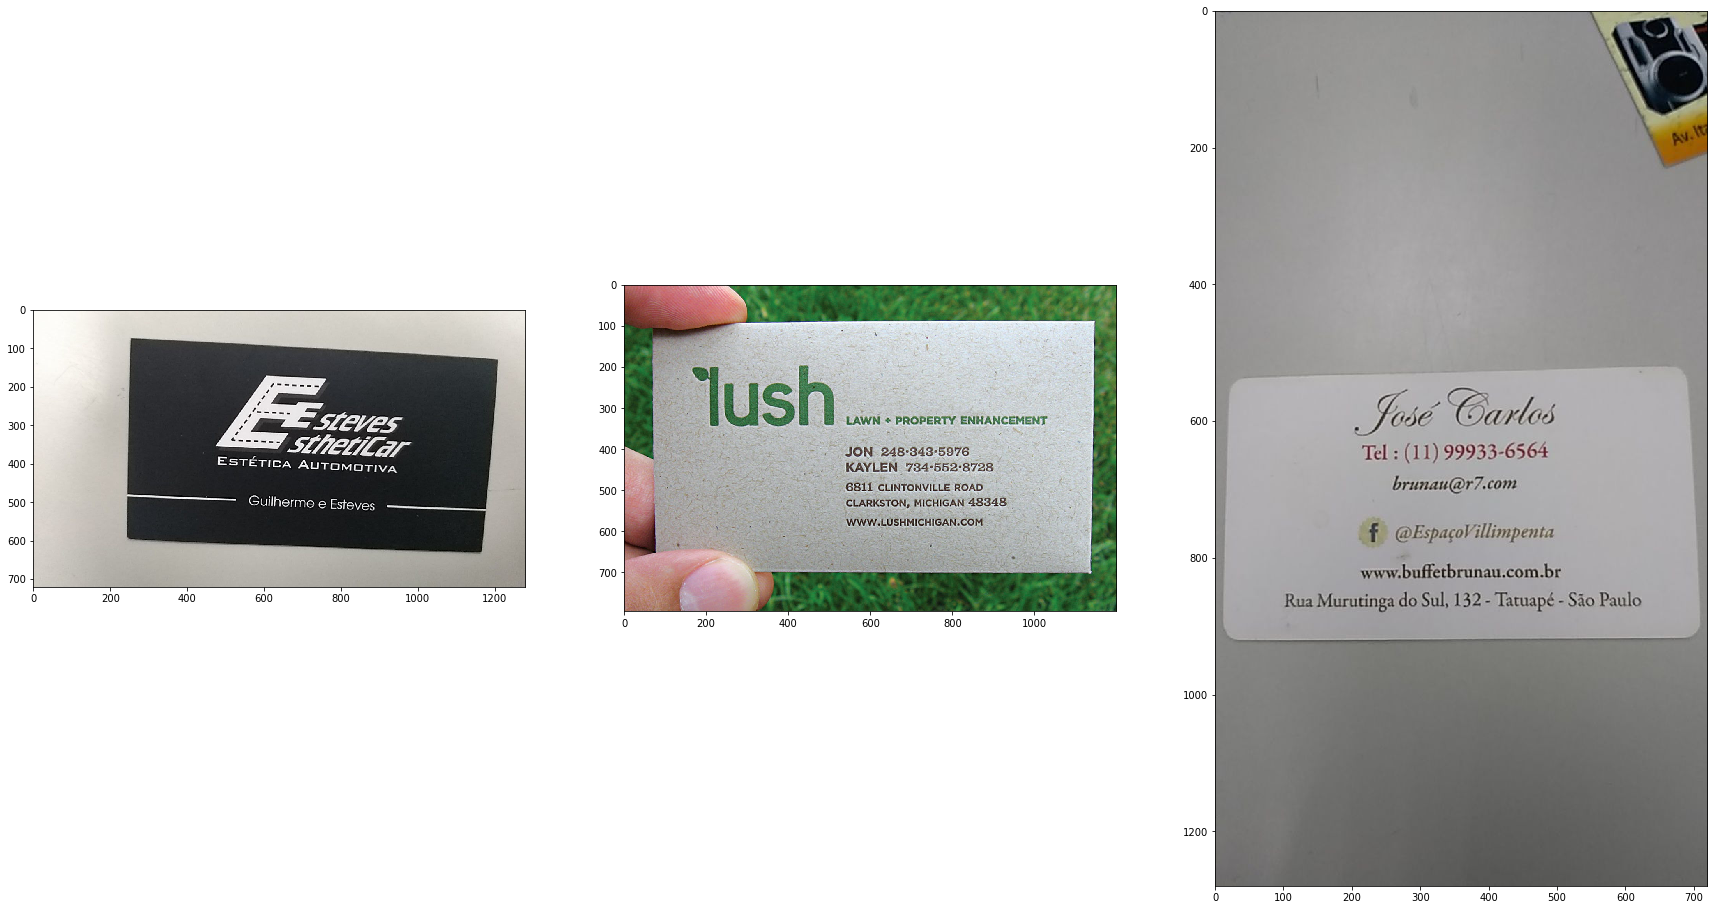

In [2]:
# Listing example files
example_files = [
    './images/' + f for f in os.listdir('./images')
    if os.path.isfile(os.path.join('./images', f))
]
# Selecting files for testing
file_img1 = './images/806123698_321554.jpg'
file_img2 = './images/ex2.png'
file_img3 = './images/806625065_155784.jpg'
img1 = imageio.imread(file_img1)
img2 = imageio.imread(file_img2)
img3 = imageio.imread(file_img3)
plt.figure(figsize=(30, 30))
plt.subplot(131)
plt.imshow(img1)
plt.subplot(132)
plt.imshow(img2)
plt.subplot(133)
plt.imshow(img3)
plt.show()

 ## Development stages
 ### Corner detection
 - Pre-processing:
   - Denoising, using Fast Nl Means. (OpenCV)
   - Convert to grayscale.
   - Filtering, utilizing the sobel operator. (Scikit-image)
   - Thresholding, using Otsu's method. (Scikit-image)
 - Harris Corner Detector
   - Spatial derivative calculation (dx, dy)
        - Using the Sobel operator to approximate X and Y derivatives
   - Structure Tensor Setup (ixx, ixy, iyy)
       - ixx, ixy, iyy = dx\*\*2, dx \* dy, dy\*\*2
   - Harris response calculation (r)
       - For each pixel, calculate the sum of the structure tensor elements
           over its region (according to input parameter).
       - Calculate determinant and trace of matrix
           - det = ((sxx \* syy) - (sxy\*\*2))
           - trace = sxx + syy
       - r = det(M) - k \* trace(M)^2; k is a constant
   - If r > threshold, the pixel is a considered a corner point
 - Shi-Tomasi Corner Detector
   - Differs in the response calculation (r)
       - r = min(sxx, syy)
 - For each quadrant of the image, it is selected the closest point the its
   corners. (examples below)

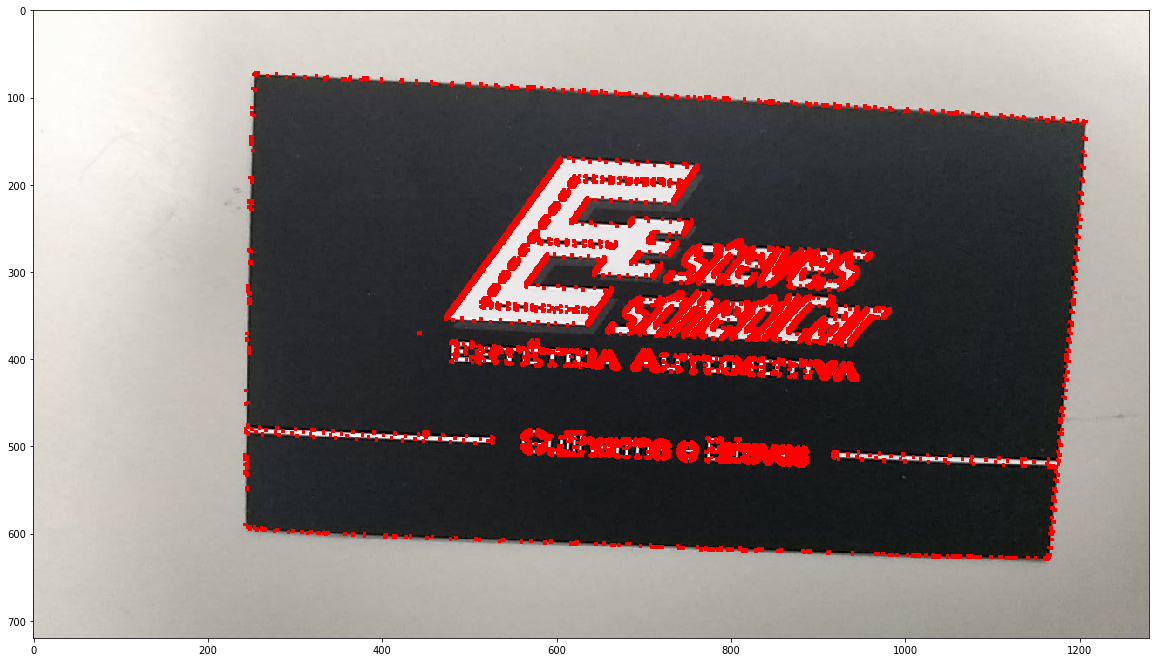

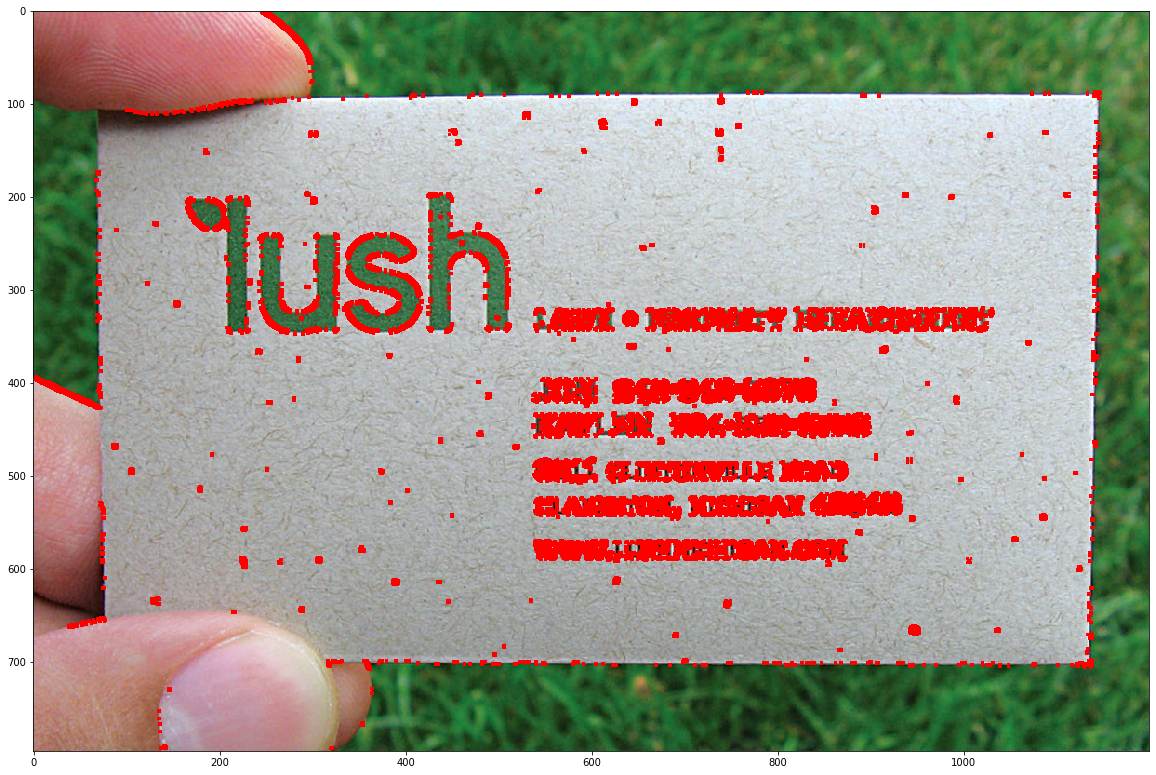

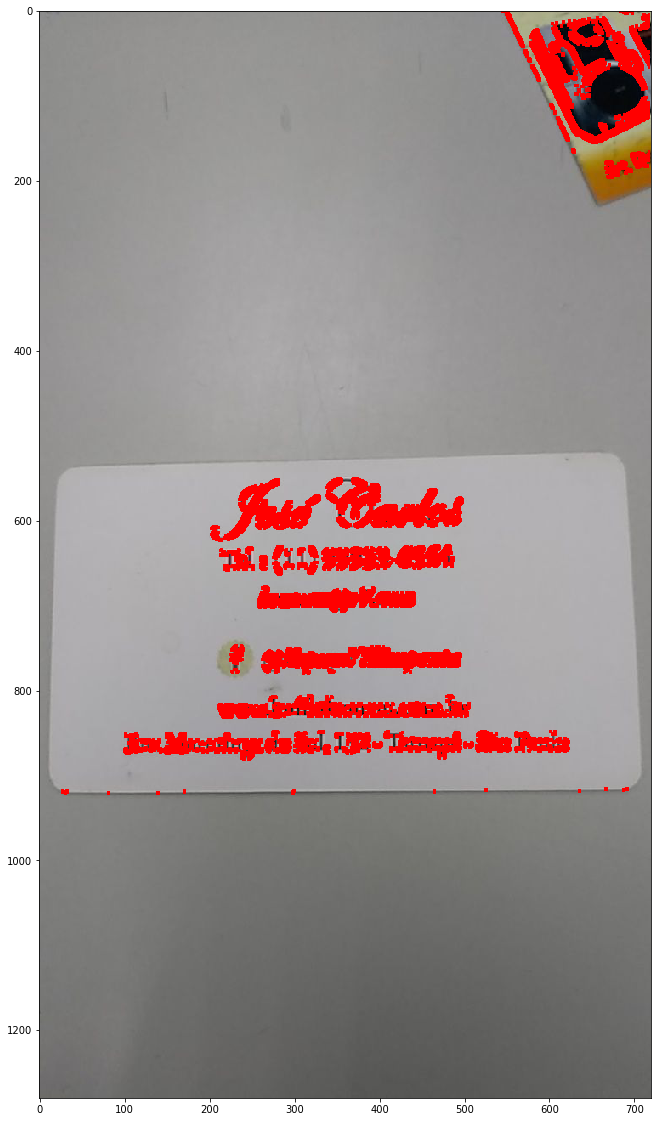

In [3]:
img1_corners = corner_detection.CornerDetector(img1).corner_detector()[0]
plt.figure(figsize=(20, 20))
plt.imshow(img1_corners)
plt.show()
img2_corners = corner_detection.CornerDetector(img2).corner_detector()[0]
plt.figure(figsize=(20, 20))
plt.imshow(img2_corners)
plt.show()
img3_corners = corner_detection.CornerDetector(img3).corner_detector()[0]
plt.figure(figsize=(20, 20))
plt.imshow(img3_corners)
plt.show()

 ### Perspective transform (projective transformation)
 - Generate a new image, repairing the perspective of the original image.
 - Calculate destination image's shape.
 - Compute projective mapping of the four corner points of the original image
   and the destination image.
 - Create matrix for transformation from the coordinates of the source image,
   to the coordinates of the output image.
 - Transform each pixel from the source image, to the destination image.

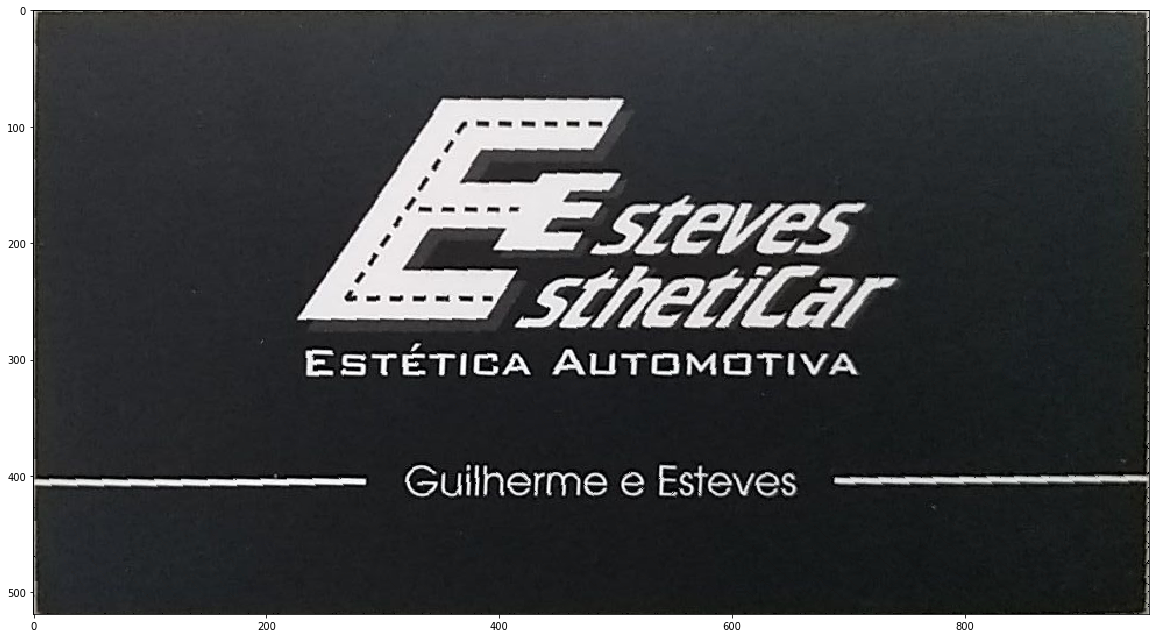

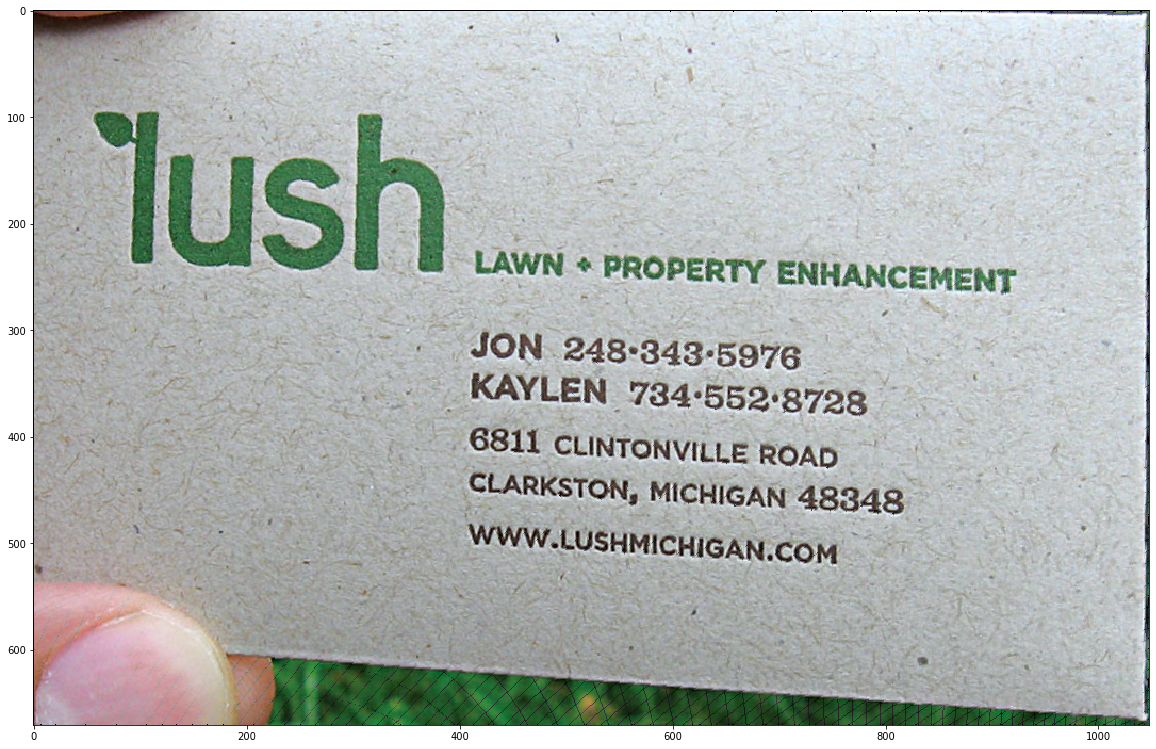

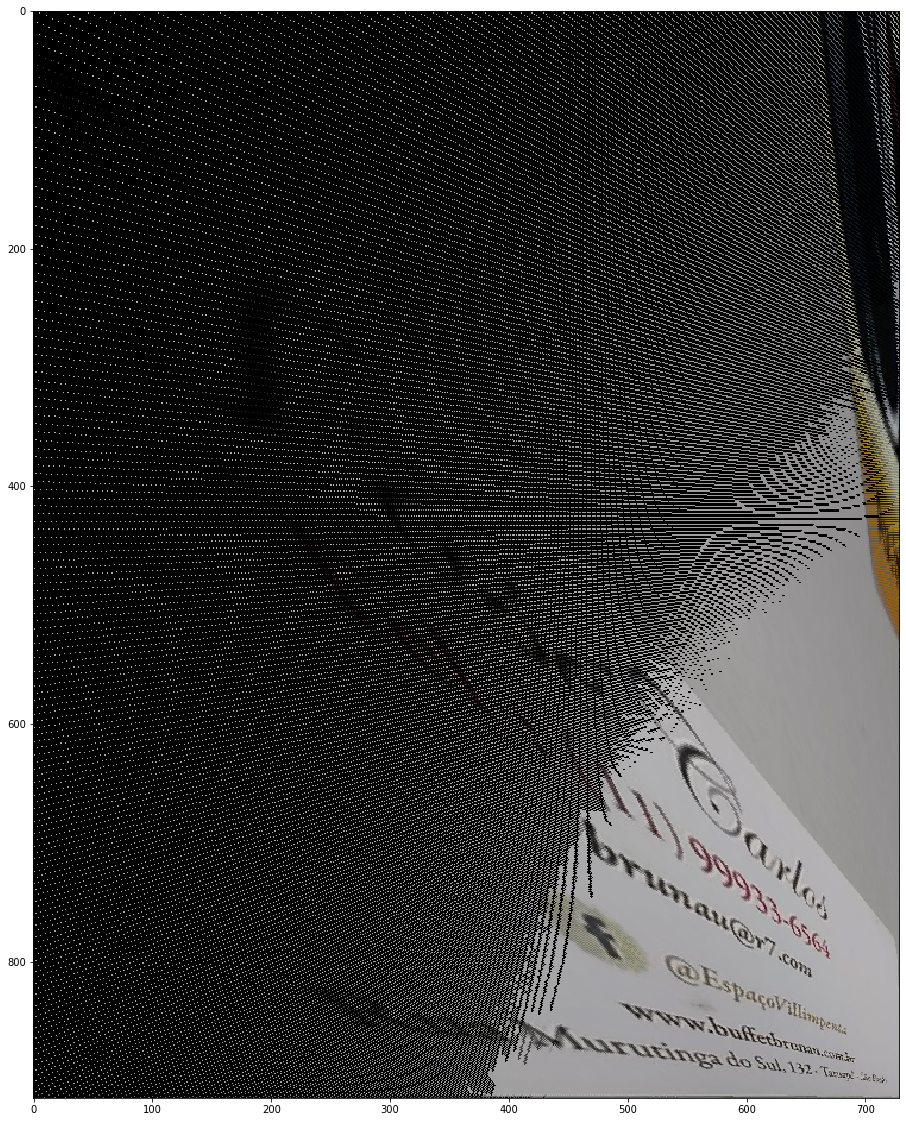

In [4]:
corner_points1 = corner_detection.CornerDetector(img1).find_corners4().astype(
    np.float32)
corner_points1[:, [0, 1]] = corner_points1[:, [1, 0]]
img1_t = perspective_transform.PerspectiveTransform(
    img1, corner_points1).four_point_transform()
plt.figure(figsize=(20, 20))
plt.imshow(img1_t)
plt.show()

corner_points2 = corner_detection.CornerDetector(img2).find_corners4().astype(
    np.float32)
corner_points2[:, [0, 1]] = corner_points2[:, [1, 0]]
img2_t = perspective_transform.PerspectiveTransform(
    img2, corner_points2).four_point_transform()
plt.figure(figsize=(20, 20))
plt.imshow(img2_t)
plt.show()

corner_points3 = corner_detection.CornerDetector(img3).find_corners4().astype(
    np.float32)
corner_points3[:, [0, 1]] = corner_points3[:, [1, 0]]
img3_t = perspective_transform.PerspectiveTransform(
    img3, corner_points3).four_point_transform()
plt.figure(figsize=(20, 20))
plt.imshow(img3_t)
plt.show()

 ### Text detection/recognition (OpenCV)
 - Pre-processing
   - Convert to grayscale
   - Apply sobel filter
   - Apply Otsu's thresholding
 - Utilizing morphological image processing techniques
   - Structuring Element (cv2.MORPH_RECT, variable size)
   - Closing operation
 - Finding contours and bounding boxes, filtering for text candidates
 - For each detected region, use it as input to pytesseract neural network
   - Get output recognized text

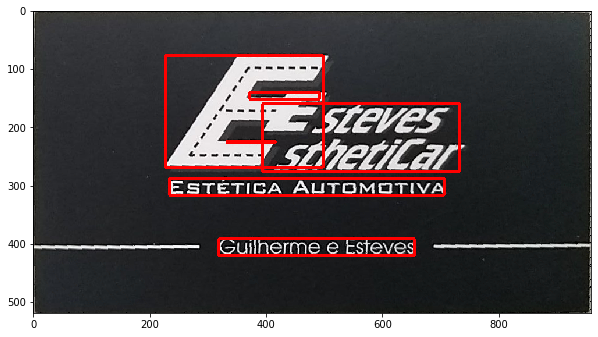

Guilherme e Esteves
ESTéTlBA ALITU ML'ITIVA

rile/{£5
Vii/76271277




In [5]:
img1_t_cv = cv2.cvtColor(img1_t, cv2.COLOR_RGB2BGR)
bboxes1 = text_detection.detect_text(img1_t_cv, (30, 10))

for box in bboxes1:
    x, y, w, h = box
    cv2.rectangle(img1_t_cv, (x, y), (x + w, y + h), (0, 0, 255), 3, 8, 0)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img1_t_cv, cv2.COLOR_BGR2RGB))
plt.show()

for box in bboxes1:
    x, y, w, h = box
    print(
        text_detection.find_text_pytesseract(img1_t[y:y + h + 1, x:x + w + 1]))

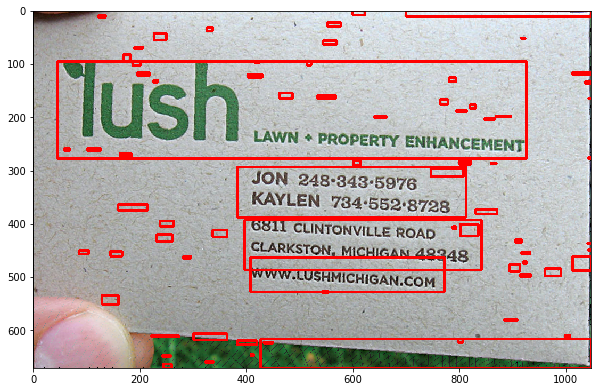



















v. .. . .uu

WWW. LUSHMICHIGAN. COM













6811 CLINTONVILLE ROAD
CLARKSTON, MICHIGAN 48348


'2‘.
JON 248'343'5976
‘ KAYLEN , 734'552'8728
























u
LAWN . mopsn'nr ENHANCEMENT
’1











In [6]:
img2_t_cv = cv2.cvtColor(img2_t, cv2.COLOR_RGB2BGR)
bboxes2 = text_detection.detect_text(img2_t_cv, (30, 10))

for box in bboxes2:
    x, y, w, h = box
    cv2.rectangle(img2_t_cv, (x, y), (x + w, y + h), (0, 0, 255), 3, 8, 0)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img2_t_cv, cv2.COLOR_BGR2RGB))
plt.show()

for box in bboxes2:
    x, y, w, h = box
    print(
        text_detection.find_text_pytesseract(img2_t[y:y + h + 1, x:x + w + 1]))

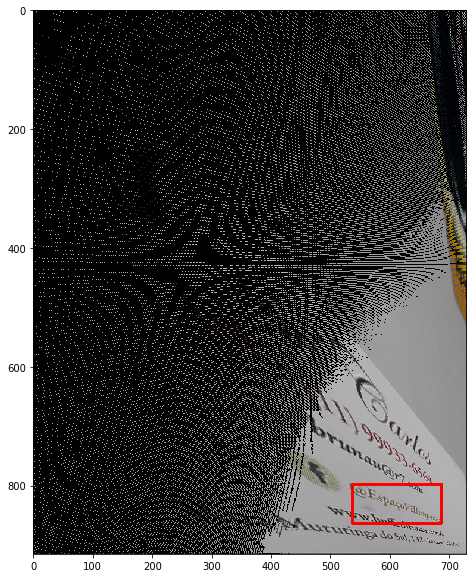

In [7]:
img3_t_cv = cv2.cvtColor(img3_t, cv2.COLOR_RGB2BGR)
bboxes3 = text_detection.detect_text(img3_t_cv, (30, 10))

for box in bboxes3:
    x, y, w, h = box
    cv2.rectangle(img3_t_cv, (x, y), (x + w, y + h), (0, 0, 255), 3, 8, 0)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img3_t_cv, cv2.COLOR_BGR2RGB))
plt.show()

for box in bboxes3:
    x, y, w, h = box
    print(
        text_detection.find_text_pytesseract(img3_t[y:y + h + 1, x:x + w + 1]))
